# Sensitivity analysis with SALib

Copyright (C) 2022 Swiss Tropical and Public Health Institute

Author: Aatreyee Mimi Das

This code is free software; you can redistribute it and/or modify it under the terms of version 2 of the GNU General Public License as published by the Free Software Foundation.

In [18]:
from SALib.analyze import sobol
import numpy as np
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

In [19]:
pwd()

'/scicore/home/chitnis/aatrey0000/importation/i3/processed_data/sensitivityanalysis'

In [20]:
dirfigures = '~/figures/'
dirprocesseddata = '~/processed_data/sensitivityanalysis/'

In [21]:
# Go to folder where sensitivity analysis outputs are stored 

chdir('~/outputs/SA')

n = 3
array_size = 4608
sims_per_array = 128
n_samples = 32768

outI = np.zeros((array_size*sims_per_array, n))
outDi = np.zeros((array_size*sims_per_array, n))

# Read in all output files
for i in range(array_size):
    filename = filename = 'I_out_saltelli_' + str(n_samples) +\
        '_run_no_' + str(i) + '.txt' 
    outI[i*sims_per_array:(i+1)*sims_per_array,:] = np.loadtxt(filename, float)

In [22]:
for i in range(array_size):
    filename = filename = 'Di_out_saltelli_' + str(n_samples) +\
        '_run_no_' + str(i) + '.txt' 
    outDi[i*sims_per_array:(i+1)*sims_per_array,:] = np.loadtxt(filename, float)

In [23]:
chdir('~/data/')
df = pd.read_csv('RADZEC_data.csv')
pop = df['pop']

In [24]:
# Define parameters of interest and range for SALib package

problem = {
    'num_vars': 16,
    'names': ['betaP', 
              'betaU', 
              'betaM', 
              'inflength', 
              'tauHHP', 
              'tauHHU',
              'treatseekP', 
              'treatseekU', 
              'rdtsens',
              'followup',
              'thetaUP',
              'thetaMP',
              'thetaPU',
              'thetaMU',
              'thetaPM',
              'thetaUM'],
    'bounds': [[0.004, 0.006],
               [0.003, 0.005],
               [0.0045, 0.0065],
               [0.004, 0.006],
               [1, 20],
               [1, 20],
               [0, 0.001],
               [0, 0.001],
               [0, 1],
               [0, 1],
               [0, 0.03],
               [0, 0.03],
               [0, 0.03],
               [0, 0.03],
               [0, 0.03],
               [0, 0.03]]
}

## Results from the sensitivity analysis with SALib

0.8339747592446786
[0.35931851 0.196552   0.33408843 0.13360749 0.00111796 0.00236477
 0.00290168 0.00439962 0.02908783 0.03003681 0.00282848 0.04456504
 0.00354685 0.02355313 0.00882424 0.01665007]


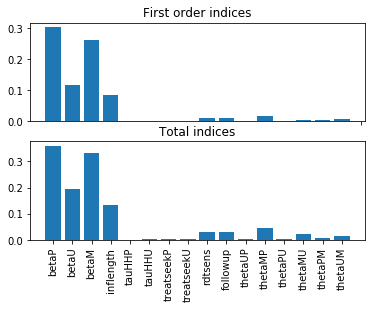

In [25]:
Si = sobol.analyze(problem, outDi[:,0]+outDi[:,1], calc_second_order=False)

chdir(dirprocesseddata)
Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_incidence_ZNZ.csv', index=False)

In [26]:
Si = sobol.analyze(problem, (outI[:,0]*pop[0]+outI[:,1]*pop[1])/(pop[0]+pop[1]), calc_second_order=False)

[0.1717355  0.09693522 0.59017434 0.15604445 0.00081798 0.00129662
 0.00174618 0.00336702 0.03096931 0.031316   0.00122808 0.01825449
 0.0015429  0.02366484 0.00651104 0.01351714]


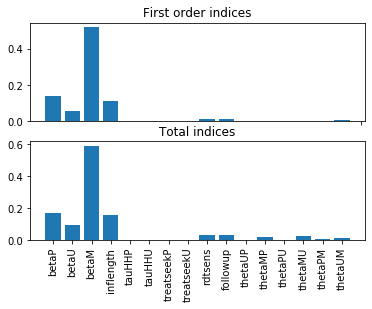

In [27]:
chdir(dirprocesseddata)

Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_prevalence_ZNZ.csv', index=False)

In [28]:
Si = sobol.analyze(problem, outI[:,0], calc_second_order=False)

[5.64369067e-01 2.26338451e-04 3.16957925e-01 1.36750147e-01
 2.49091641e-03 1.89772636e-03 5.02004539e-03 1.93740046e-03
 1.72522720e-02 1.72226820e-02 2.03783511e-03 5.76957734e-02
 2.96368075e-03 3.69063496e-03 1.98607066e-02 3.67177866e-03]


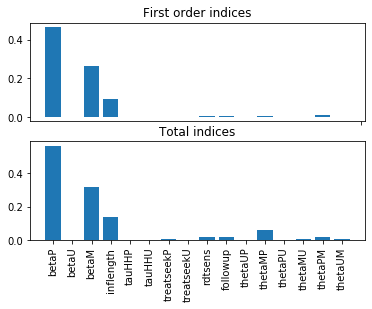

In [30]:
chdir(dirprocesseddata)

Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_prevalence_P.csv', index=False)

0.8042725977280697
[1.76375955e-03 2.45289693e-01 6.51073969e-01 1.36994981e-01
 2.27418517e-04 1.80034975e-03 6.28013693e-04 7.09014583e-03
 4.46338362e-02 4.54374912e-02 1.55336857e-03 1.74332081e-03
 1.63277437e-03 5.71404468e-02 1.87396386e-03 3.20214187e-02]


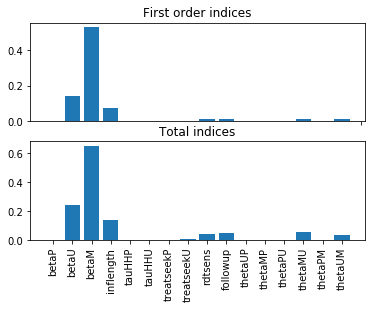

In [31]:
Si = sobol.analyze(problem, outI[:,1], calc_second_order=False)

chdir(dirprocesseddata)

Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_prevalence_U.csv', index=False)

0.8629082075213476
[7.64410116e-01 1.90286625e-04 1.33866896e-01 8.99830696e-02
 2.02671062e-03 2.88130136e-03 4.98665144e-03 2.92255563e-03
 1.24018319e-02 1.24638054e-02 3.05876892e-03 9.18336641e-02
 4.53741613e-03 5.47537464e-03 1.54816877e-02 5.46480909e-03]


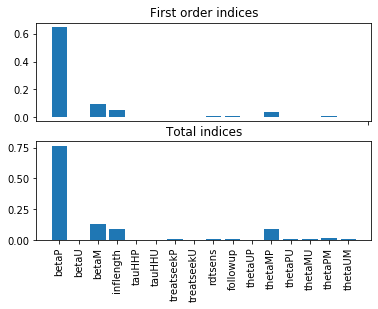

In [32]:
Si = sobol.analyze(problem, outDi[:,0], calc_second_order=False)

chdir(dirprocesseddata)

Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_incidence_P.csv', index=False)

0.7269272536277807
[2.26793877e-03 5.55914316e-01 4.12854339e-01 1.31787592e-01
 5.12757667e-04 2.80766589e-03 1.56902583e-03 8.52680491e-03
 4.76378009e-02 4.99901740e-02 3.96557331e-03 4.23528144e-03
 4.08285216e-03 5.87448857e-02 4.76953729e-03 4.01011730e-02]


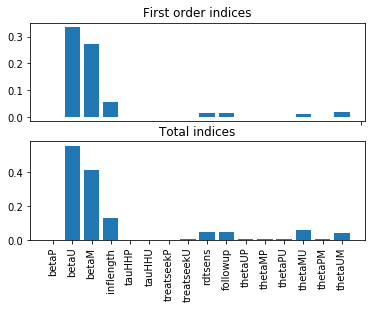

In [33]:
Si = sobol.analyze(problem, outDi[:,1], calc_second_order=False)

chdir(dirprocesseddata)

Sidf = pd.DataFrame.from_dict(Si)
Sidf['names'] = problem['names']
Sidf.to_csv('SA_incidence_U.csv', index=False)

# PRCC with same model inputs and outputs

This was run to compare PRCC results to Sobol indices. The results were found to be similar.

Method from Blower and Dowlatabadi (1994), Sensitivity and Uncertainty Analysis of Complex Models of Disease Transmission: An HIV Model, as an Example. Thanks to Emma Fairbanks for also sharing a MATLAB version of this code. 

In [43]:
import scipy.stats as ss

In [44]:
chdir('/scicore/home/chitnis/aatrey0000/importation/i3/data/SA')

input_params = np.loadtxt('param_values_saltelli_32768.txt')
output = outDi[:,0]+outDi[:,1]

In [45]:
no_params = problem['num_vars']

params_rank = np.zeros((np.shape(input_params)))
output_rank = np.zeros(((len(output),1)))

In [46]:
for i in range(no_params):
    params_rank[:,i] = ss.rankdata(input_params[:,i])
output_rank = ss.rankdata(output)

In [47]:
output_rank = np.reshape(output_rank, (len(output),1))

In [48]:
ranks = np.hstack((params_rank, output_rank))

ranks = ranks.T
print(ranks.shape)

avg_rank = (len(output)+1)/2

(17, 589824)


In [49]:
C = np.zeros((no_params+1,no_params+1))

for i in range(no_params+1):
    for j in range(no_params+1):
        C_numerator = np.dot((ranks[i,:]-avg_rank),(ranks[j,:]-avg_rank))
        
        C_denominator_1 = np.zeros((n_samples))
        C_denominator_2 = np.zeros((n_samples))
        for t in range(n_samples):
            C_denominator_1[t] = (ranks[i,t] - avg_rank)**2
            C_denominator_2[t] = (ranks[j,t] - avg_rank)**2
        C_denominator = (np.sum(C_denominator_1)*np.sum(C_denominator_2))**0.5
        
        C[i,j] = C_numerator/C_denominator

In [50]:
B = np.linalg.inv(C)

PRCC = np.zeros((no_params))
for i in range(no_params):
    PRCC[i] = -B[i,no_params]/(B[i,i]*B[no_params,no_params])**0.5

Now loop through for all different outputs and calculate the PRCC

(17, 589824)
(17, 589824)
(17, 589824)
(17, 589824)
(17, 589824)
(17, 589824)


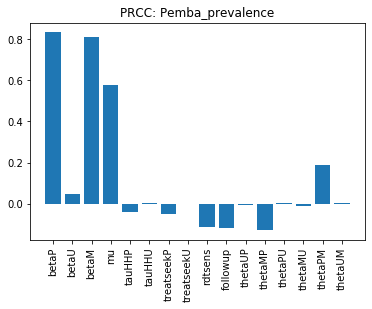

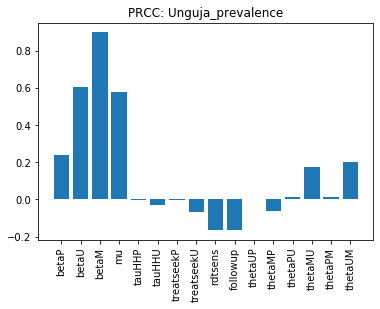

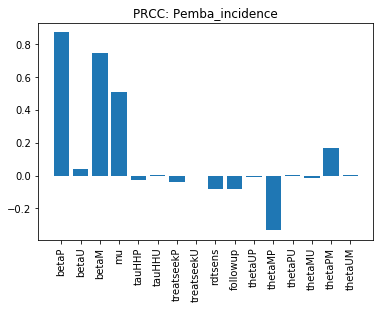

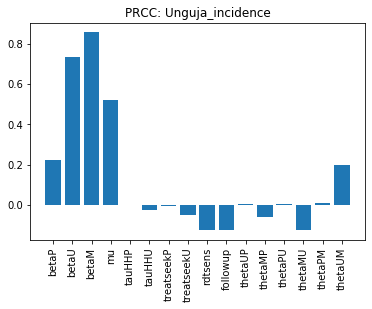

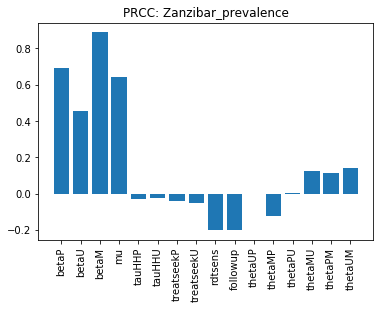

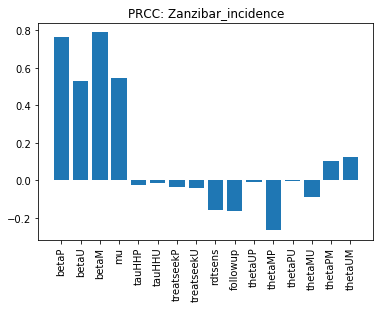

In [51]:
import scipy.stats as ss

chdir('~/sensitivity_analysis/')

input_params = np.loadtxt('param_values_saltelli_32768.txt')

outputs_list_names = ['Pemba_prevalence','Unguja_prevalence','Pemba_incidence','Unguja_incidence',\
                'Zanzibar_prevalence', 'Zanzibar_incidence']
outputs_list = [outI[:,0], outI[:,1], outDi[:,0], outDi[:,1], \
                (outI[:,0]*pop[0]+outI[:,1]*pop[1])/(pop[0]+pop[1]), outDi[:,0]+outDi[:,1]]


for k in range(len(outputs_list)):
    output = outputs_list[k]
    for i in range(no_params):
        params_rank[:,i] = ss.rankdata(input_params[:,i])
    output_rank = ss.rankdata(output)    
    output_rank = np.reshape(output_rank, (len(output),1))
    ranks = np.hstack((params_rank, output_rank))

    ranks = ranks.T
    print(ranks.shape)

    avg_rank = (len(output)+1)/2
    
    C = np.zeros((no_params+1,no_params+1))

    for i in range(no_params+1):
        for j in range(no_params+1):
            C_numerator = np.dot((ranks[i,:]-avg_rank),(ranks[j,:]-avg_rank))

            C_denominator_1 = np.zeros((n_samples))
            C_denominator_2 = np.zeros((n_samples))
            for t in range(n_samples):
                C_denominator_1[t] = (ranks[i,t] - avg_rank)**2
                C_denominator_2[t] = (ranks[j,t] - avg_rank)**2
            C_denominator = (np.sum(C_denominator_1)*np.sum(C_denominator_2))**0.5

            C[i,j] = C_numerator/C_denominator
    B = np.linalg.inv(C)

    PRCC = np.zeros((no_params))
    for i in range(no_params):
        PRCC[i] = -B[i,no_params]/(B[i,i]*B[no_params,no_params])**0.5
        
    plt.figure()
    plt.bar(problem['names'],PRCC) 
    plot_title = 'PRCC: ' + outputs_list_names[k]
    plt.title(plot_title)
    plt.xticks(rotation=90)
    
    filename = 'PRCC' + outputs_list_names[k] + '.png'

    chdir(dirfigures)
    plt.savefig(filename, bbox_inches='tight')